In [18]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
Nhanes_ds = pd.read_csv("datasets/Nhanes.csv")
Nhanes_ds.head(10)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


In [20]:
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
Nhanes_ds = Nhanes_ds[vars].dropna()
Nhanes_ds.head(10)

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2
5,116.0,72,2,1,2.0,28.6,2
6,110.0,22,1,4,4.0,28.0,1
7,120.0,32,2,1,4.0,28.2,2
9,178.0,56,1,4,3.0,33.6,2
10,144.0,46,1,3,5.0,27.6,1


In [21]:
model1 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR" , data = Nhanes_ds)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          2.09e-259
Time:                        17:37:49   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our initial model shows that there is positive co-relation between age and systolic BP and we have a strong statistical evidence to prove it, with increase in 1 year in age the Systolic BP is increases by 0.4759 and 20.7% of the variation in SBP is explained by age.

lets see by adding the other variables can we better fit our data


In [22]:
error = np.sum(np.abs(result1.fittedvalues - Nhanes_ds["BPXSY1"]))/Nhanes_ds.shape[0] * 100
error

1244.7093274485128

<AxesSubplot:xlabel='BPXSY1', ylabel='Count'>

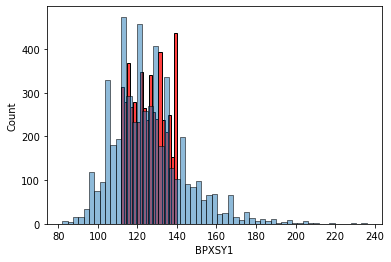

In [23]:
sns.histplot(result1.fittedvalues , color = "r")
sns.histplot(Nhanes_ds["BPXSY1"] , alpha = 0.5)

In [32]:
Nhanes_ds["RIAGENDRx"] = Nhanes_ds.RIAGENDR.replace({1:"Male" , 2 : "Female"})
model2 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx " , data = Nhanes_ds)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          1.87e-268
Time:                        17:39:49   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

rise in systolic BP of Male of same age as of female is 3.2322 more that the female. 
Our Fit is slightly increases with R square value of 21.5%

In [33]:
cc = Nhanes_ds[["RIDAGEYR", "RIAGENDR"]].corr()
cc

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


Gender and age is nearly uncorrelated , thats why we dont see any change in our age coeff.

<AxesSubplot:>

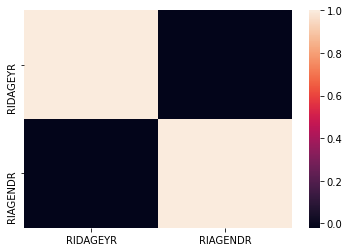

In [34]:
sns.heatmap(cc)

In [35]:
# Nhanes_ds["SMQ020x"] = Nhanes_ds.SMQ020.replace({1: "Yes" , 2 : "No"})
model3 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx " , data = Nhanes_ds)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          8.54e-286
Time:                        17:39:58   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So BMI also has positive association with SBP. Given two subjects with the same gender and age, and whose BMI differs by 1 unit, the person with greater BMI will have, on average, 0.31 units greater systolic blood pressure (SBP).
Also note that gender coefficient is slightly increases after adding the BMI variable in our model. This shows that our three covariates are mutually correlated.

          RIDAGEYR    BMXBMI  RIAGENDR
RIDAGEYR  1.000000  0.023089 -0.021398
BMXBMI    0.023089  1.000000  0.080463
RIAGENDR -0.021398  0.080463  1.000000


<AxesSubplot:>

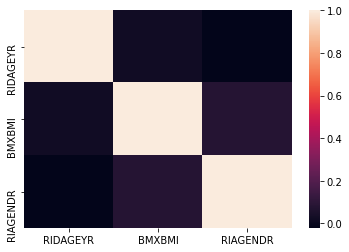

In [36]:
cc = Nhanes_ds[["RIDAGEYR" , "BMXBMI" , "RIAGENDR"]].corr()
print(cc)
sns.heatmap(cc)

Although the correlations among these three variables are not strong, they are sufficient to induce fairly substantial differences in the regression coefficients (e.g. the gender coefficient changes from 3.23 to 3.58). In this example, the gender effect becomes larger after we control for BMI - we can take this to mean that BMI was masking part of the association between gender and blood pressure. In other settings, including additional covariates can reduce the association between a covariate and an outcome.

c:\users\prash\documents\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


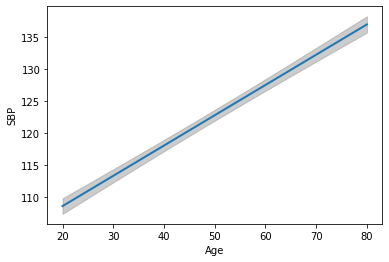

In [57]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}


pr , cb , fv = predict_functional(result3  , "RIDAGEYR" ,
                                 values = values , ci_method="simultaneous")

ax = sns.lineplot(fv , pr , lw = 2)
ax.fill_between(fv , cb[:,0] , cb[:,1] , color = "grey" , alpha = 0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")


c:\users\prash\documents\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


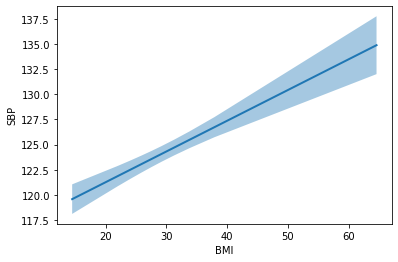

In [63]:
# del values["BMXBMI"]
values["RIDAGEYR"] = 50
pr , cb , fv = predict_functional(result3 , "BMXBMI" , 
                                 values = values , ci_method = "simultaneous")

ax = sns.lineplot(fv , pr , lw = 2)
ax.fill_between(fv , cb[:,0] , cb[:,1] , alpha = 0.4)
ax.set_xlabel("BMI")
_ = ax.set_ylabel("SBP")

The error band for BMI is notably wider than the error band for age, indicating that there is less certainty about the relationship between BMI and SBP compared to the relationship between age and SBP. The model may estimate that a 50 year old female will have on average an SBP of 125. But a specific 50 year old female may have a blood pressure of 110 or 150, for example. The fitted values for both of these women are 125, and their residuals are -15, and 25, respectively.

The simplest variance pattern that we can see in a linear regression occurs when the points are scattered around the mean, with the same degree of scatter throughout the range of the covariates. When there are multiple covariates, it is hard to assess whether the variance is uniform throughout this range, but we can easily check for a "mean/variance relationship", in which there is a systematic relationship between the variance and the mean, i.e. the variance either increases or decreases systematically with the mean. The plot of residuals on fitted values is used to assess whether such a mean/variance relationship is present.

c:\users\prash\documents\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


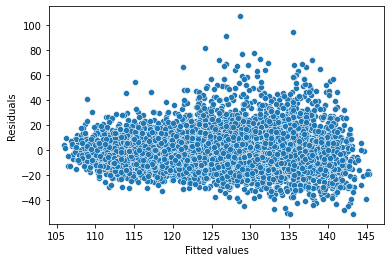

In [64]:
pp = sns.scatterplot(result3.fittedvalues, result3.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

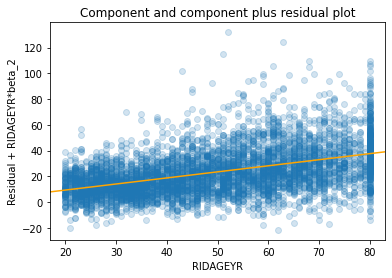

In [65]:
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()

plot_ccpr(result3,"RIDAGEYR", ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

A "component plus residual plot" or "partial residual plot" is intended to show how the data would look if all but one covariate could be fixed at reference values. By controlling the values of these covariates, all remaining variation is due either to the "focus variable" (the one variable that is left unfixed, and is plotted on the horizontal axis), or to sources of variation that are unexplained by any of the covariates
the partial residual plot above shows how age (horizontal axis) and SBP (vertical axis) would be related if gender and BMI were fixed. Note that the origin of the vertical axis in these plots is not meaningful (we are not implying that anyone's blood pressure would be negative), but the differences along the vertical axis are meaningful. This plot implies that when BMI and gender are held fixed, the average blood pressures of an 80 and 18 year old differ by around 30 mm/Hg. This plot also shows, as discussed above, that the deviations from the mean are somewhat smaller at the low end of the range compared to the high end of the range. We also see that at the high end of the range, the deviations from the mean are somewhat right-skewed, with exceptionally high SBP values being more common than exceptionally low SBP values.

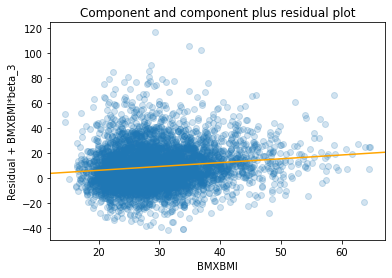

In [68]:
ax = plt.axes()

plot_ccpr(result3,"BMXBMI", ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
ax.lines[1].set_color('orange')

we have a partial residual plot that shows how BMI (horizontal axis) and SBP (vertical axis) would be related if gender and age were fixed. Compared to the plot above, we see here that age is more uniformly distributed than BMI. Also, it appears that there is more scatter in the partial residuals for BMI compared to what we saw above for age. Thus there seems to be less information about SBP in BMI, although a trend certainly exists.

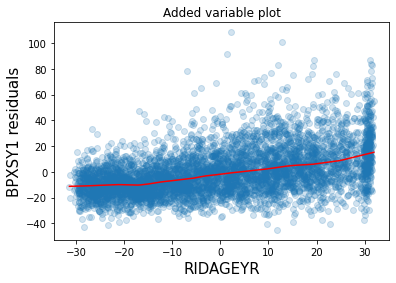

In [72]:
from statsmodels.graphics.regressionplots import add_lowess

model4 = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=Nhanes_ds)
result4 = model4.fit()
result4.summary()


fig = result4.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

note that the two variables being plotted (age and blood pressure) have been centered. The scale of the variables is unchanged, but the origin has been translated to zero. The red line is an estimte of the relationship between age and blood pressure. Unlike the relationship in the model3, it is not forced to be linear, and there is in fact a hint that the shape is slightly flatter for the first 15 years or so of age. This would imply that blood pressure increases slightly more slowly for people in theie 20s and early 30s, then begins increasing faster after that point.